## Importing Library


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\abdos\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## File visualitation and Data Cleaning

In [2]:
data = pd.read_csv("insurance-data.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(data.info(), "\n")
print(data.describe(), "\n")
print(data.isnull().sum(), "\n")
print(data.duplicated().sum(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
m

## there is one duplicate data and no null data 
## here is we will drop it 


In [4]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

## Determine Outlires


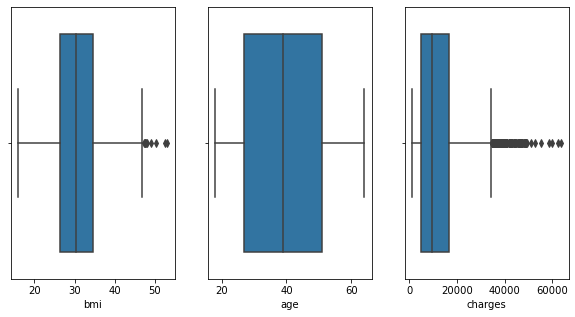

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(x = "bmi"  ,data = data )
plt.subplot(1,3,2)
sns.boxplot(x = "age"  ,data = data )
plt.subplot(1,3,3)
sns.boxplot(x = "charges"  ,data = data );


## There is huge number of outlire in charges and little in bmi 
## Its better to drop it

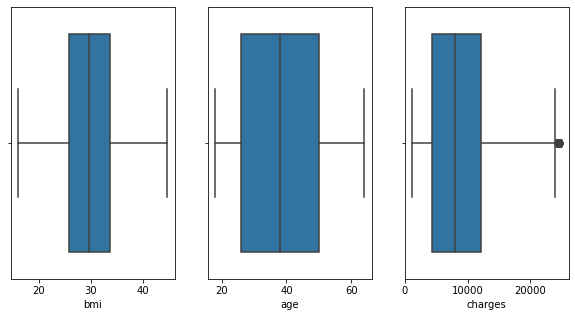

In [6]:
data = data [data["bmi"] < 45]
data = data [data["charges"] < 25000]
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(x = "bmi"  ,data = data )
plt.subplot(1,3,2)
sns.boxplot(x = "age"  ,data = data )
plt.subplot(1,3,3)
sns.boxplot(x = "charges"  ,data = data );


## Now we have clean data to work on it

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Visualization and Statistics

## Who insurance more?


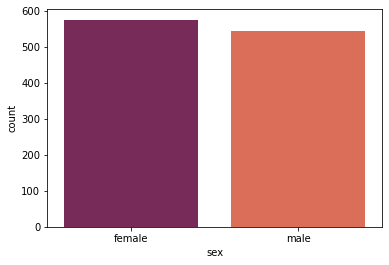

In [8]:
sns.countplot(x="sex"  ,  data = data, palette = "rocket" );
# Females , but There is no big difference

## Relation between insurance and Children

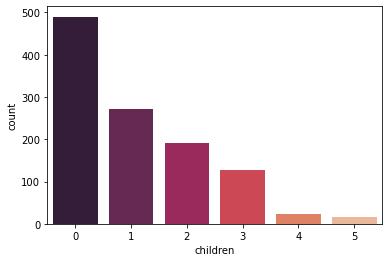

In [9]:
sns.countplot( x = "children" ,data = data, palette = "rocket" );
# The more children, The lower insurance

## smoke make different ?


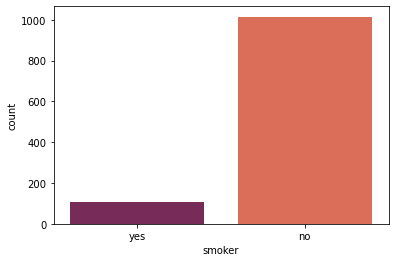

In [10]:
sns.countplot( x = "smoker" ,data = data, palette = "rocket" );
# sure yes !

## who's biggest regoin that insurance ?


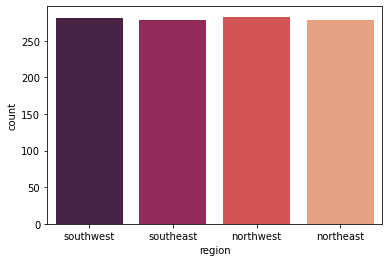

In [11]:
sns.countplot( x = "region" ,data = data, palette = "rocket" );
#Almost equal 

## Age?


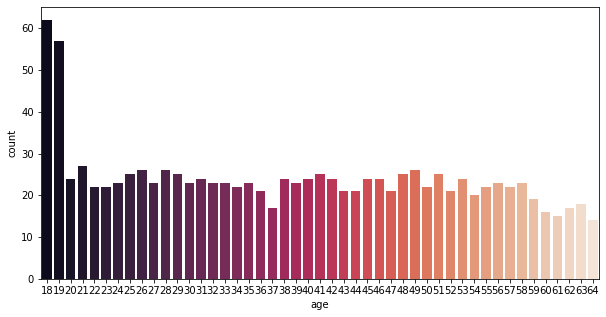

In [12]:
plt.figure(figsize=(10,5))
sns.countplot( x = "age" ,data = data, palette = "rocket" );
# after 18 , 19 Approx. the same

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Standerd BMI is 18.5 to 25 
## so, hence we categorise our bmi data

In [14]:
data['bmi_class'] = pd.cut(x=data['bmi'], bins=[0,18.5,24.9,29.9,45],labels=['Under_weight', 'Healthy', 'Over_weight','Obese'])
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,Over_weight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Over_weight


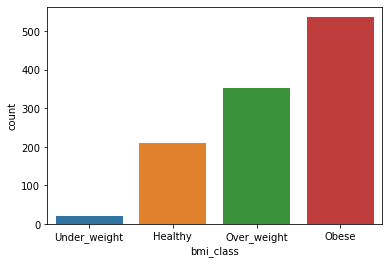

In [15]:
sns.countplot(x="bmi_class" ,  data =data );
# The more weight, The more insurance

## Is physical health related to gender for insurance?  

In [16]:
data.groupby("sex")["bmi_class"].value_counts().unstack()
# aprox. no

,Obese,Over_weight,Healthy,Under_weight
sex,,,,
female,274,181,109,12
male,263,172,102,8


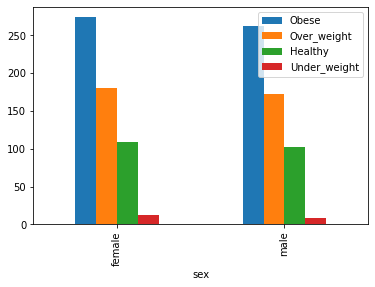

In [17]:
data.groupby("sex")["bmi_class"].value_counts().unstack().plot(kind="bar");


In [18]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,Over_weight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Healthy
4,32,male,28.880,0,no,northwest,3866.85520,Over_weight


## Is physical health related to the number of children?

In [19]:
data.groupby("children")["bmi_class"].value_counts().unstack()


,Under_weight,Healthy,Over_weight,Obese
children,,,,
0,9,90,150,241
1,5,45,99,123
2,5,41,53,92
3,0,29,34,65
4,0,1,12,10
5,1,5,5,6


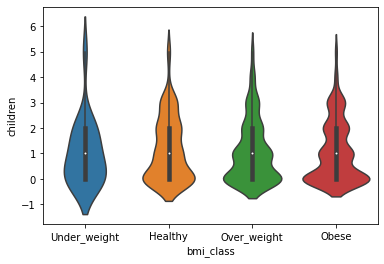

In [20]:
sns.violinplot(x="bmi_class" , y="children" , data = data);


## Age Classification 

In [27]:
data['age_class'] = pd.cut(x=data['age'], bins=[17,30,45,65],labels=['Young_adult', 'Middle-aged_adult', 'Old_adult'])
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class,age_class
0,19,female,27.900,0,yes,southwest,16884.92400,Over_weight,Young_adult
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young_adult
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young_adult
3,33,male,22.705,0,no,northwest,21984.47061,Healthy,Middle-aged_adult
4,32,male,28.880,0,no,northwest,3866.85520,Over_weight,Middle-aged_adult


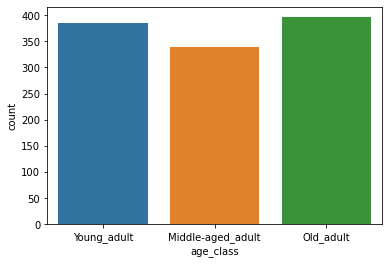

In [29]:
sns.countplot(x="age_class" ,  data =data );
# almost all classification are equal in insurance

In [32]:
data.groupby("sex")["age_class"].value_counts().unstack()
# distribution of age_class. on gender are close

,Young_adult,Middle-aged_adult,Old_adult
sex,,,
female,195,174,207
male,190,165,190


## Children with Age_Class

In [41]:
data.groupby("children")["age_class"].value_counts().unstack()


,Young_adult,Middle-aged_adult,Old_adult
children,,,
0,214,85,191
1,77,104,91
2,49,89,53
3,33,44,51
4,7,7,9
5,5,10,2


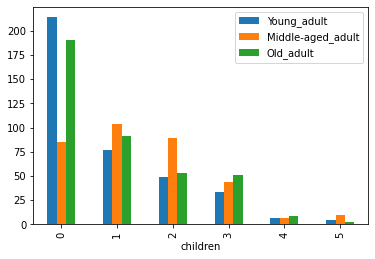

In [42]:
data.groupby("children")["age_class"].value_counts().unstack().plot(kind="bar");


In [45]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class,age_class
0,19,female,27.900,0,yes,southwest,16884.92400,Over_weight,Young_adult
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young_adult
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young_adult
3,33,male,22.705,0,no,northwest,21984.47061,Healthy,Middle-aged_adult
4,32,male,28.880,0,no,northwest,3866.85520,Over_weight,Middle-aged_adult


In [54]:
data.describe()


,age,bmi,children,charges
count,1121.000000,1121.000000,1121.000000,1121.000000
mean,38.616414,29.891463,1.083854,8903.531831
std,13.865459,5.777225,1.218942,5796.575935
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,25.740000,0.000000,4239.892650
50%,38.000000,29.640000,1.000000,7985.815000
75%,50.000000,33.725000,2.000000,12146.971000
max,64.000000,44.770000,5.000000,24915.220850


## Charges Classification

In [61]:
data['charges_class'] = pd.cut(x=data['charges'], bins=[1120,8000,12150,25000],labels=['Ragion_one', 'Ragion_two', 'Ragion_three'])
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_class,age_class,charges_class
0,19,female,27.900,0,yes,southwest,16884.92400,Over_weight,Young_adult,Ragion_three
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Young_adult,Ragion_one
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Young_adult,Ragion_one
3,33,male,22.705,0,no,northwest,21984.47061,Healthy,Middle-aged_adult,Ragion_three
4,32,male,28.880,0,no,northwest,3866.85520,Over_weight,Middle-aged_adult,Ragion_one


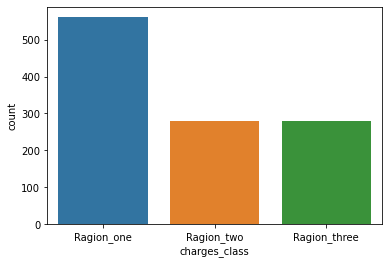

In [62]:
sns.countplot(x="charges_class" ,  data =data );
# Region one that include insurance charges of (1120 to 8000) is the most region , other to regions (8000 to 25000 ) are equal

## Age Classification Vs. Charges Classification

In [71]:
data.groupby("age_class")["charges_class"].value_counts().unstack()


,Ragion_one,Ragion_two,Ragion_three
age_class,,,
Young_adult,308,4,73
Middle-aged_adult,249,35,55
Old_adult,5,240,152


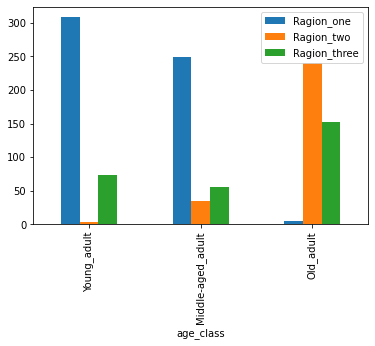

In [94]:
data.groupby("age_class")["charges_class"].value_counts().unstack().plot(kind="bar");


## BMI Classification Vs. Charges Classification

In [99]:
data.groupby("bmi_class")["charges_class"].value_counts().unstack()


,Ragion_one,Ragion_two,Ragion_three
bmi_class,,,
Under_weight,12,3,5
Healthy,101,43,67
Over_weight,174,83,96
Obese,275,150,112


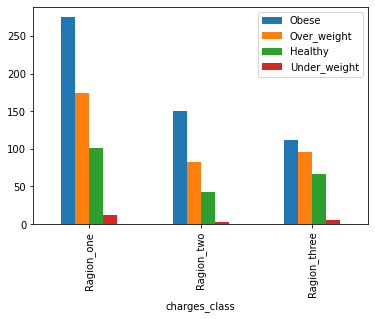

In [101]:
data.groupby("charges_class")["bmi_class"].value_counts().unstack().plot(kind="bar");

## SEX Vs. Charges Classification

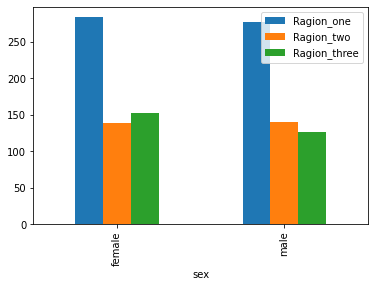

In [104]:
data.groupby("sex")["charges_class"].value_counts().unstack().plot(kind="bar");


## children Vs. Charges Classification

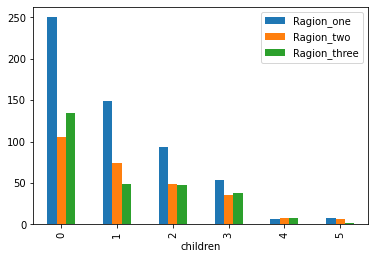

In [105]:
data.groupby("children")["charges_class"].value_counts().unstack().plot(kind="bar");


## FINAL
## Note I didn't do statics with smokers, cause its number is little